In [19]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [20]:


pit_agrs_transplant_25_60k = pd.read_csv('../cass_exp/new_pqr/trans.csv', header = 2)

pit_agrs_transplant_25_60k.sort_values(by='step', inplace=True)

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_agrs_transplant_25_60k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).var()
rolling

df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_agrs = df_av_at_step
df_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.880000,10.000000,0.000000,0.000000
1,4.0,0.940060,10.000000,0.007200,0.000000
2,5.0,0.626080,7.995999,0.298462,12.011996
3,6.0,0.719840,7.495501,0.233799,8.997981
4,7.0,0.776097,8.098807,0.190919,8.552554
...,...,...,...,...,...
29294,59833.0,0.952722,37.953551,0.039779,424.917790
29295,59844.0,0.952816,37.901696,0.039704,425.413286
29296,59848.0,0.952910,37.859934,0.039629,425.435326
29297,59854.0,0.953005,37.798276,0.039555,426.486173


In [29]:
pit_no_agrs_transplant_25_60k = pd.read_csv('../cass_exp/new_pqr/van_out.csv', header = 2)

pit_no_agrs_transplant_25_60k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_no_agrs_transplant_25_60k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        
# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()/2
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_no_agrs = df_av_at_step
df_no_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.833333,20.750000,0.000000,0.000000
1,9.0,0.666500,35.389625,0.027778,213.890625
2,10.0,0.777889,27.577485,0.032431,198.108609
3,11.0,0.833583,28.937183,0.027778,135.623099
4,14.0,0.867000,26.740988,0.023590,113.613636
...,...,...,...,...,...
6968,59900.0,0.882611,88.615631,0.050208,2268.836336
6969,59915.0,0.880847,88.488527,0.050885,2268.342063
6970,59940.0,0.881085,88.367671,0.050798,2267.461465
6971,59955.0,0.879325,88.201102,0.051471,2269.867364


In [22]:
pit_agrs_no_transplant_25_60k = pd.read_csv('../cass_exp/new_pqr/agrs_no_t.csv', header = 2)

pit_agrs_no_transplant_25_60k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_agrs_no_transplant_25_60k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_agrs_no = df_av_at_step
df_agrs_no


,step,reward,length,reward_se,length_se
0,0.0,0.680000,16.480000,0.000000,0.000000
1,4.0,0.589910,12.235760,0.016200,35.955200
2,6.0,0.726880,12.825017,0.064206,18.998174
3,7.0,0.669990,11.615141,0.055655,18.484616
4,8.0,0.635856,11.391220,0.047496,14.099044
...,...,...,...,...,...
20666,59874.0,0.931688,52.145786,0.056952,3520.015601
20667,59883.0,0.931824,52.065574,0.056847,3516.199534
20668,59897.0,0.931960,51.997511,0.056743,3511.490452
20669,59915.0,0.932096,51.925588,0.056639,3507.060954


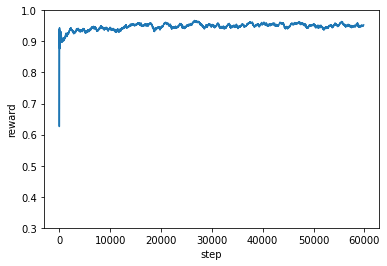

In [23]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_agrs)

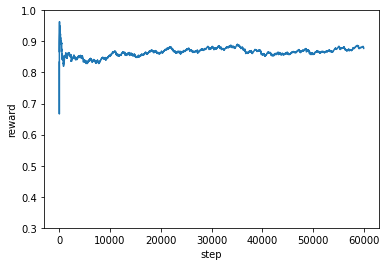

In [24]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_no_agrs)

In [25]:

pal = sns.color_palette('deep')
pal.as_hex()

['#4c72b0',
 '#dd8452',
 '#55a868',
 '#c44e52',
 '#8172b3',
 '#937860',
 '#da8bc3',
 '#8c8c8c',
 '#ccb974',
 '#64b5cd']

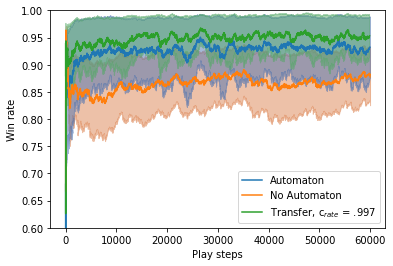

In [31]:
fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, 25x25 Fixed')
axs.set(ylim=(0.6,1))
sns.lineplot(x="step", y="reward", data=df_agrs_no,ax=axs, ci=99)
sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="reward", data=df_agrs,ax=axs, ci=99)

axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["reward"] + df_no_agrs["reward_se"], 
                 y2=df_no_agrs["reward"] - df_no_agrs["reward_se"], alpha=.5, color='#dd8452')
axs.fill_between(x=df_agrs_no["step"], y1=df_agrs_no["reward"] + df_agrs_no["reward_se"], 
                 y2=df_agrs_no["reward"] - df_agrs_no["reward_se"], alpha=.5, color='#4c72b0')

axs.fill_between(x=df_agrs["step"], y1=df_agrs["reward"] + df_agrs["reward_se"], 
                 y2=df_agrs["reward"] - df_agrs["reward_se"], alpha=.5, color='#55a868')
axs.set(xlabel='Play steps', ylabel='Win rate')

axs.legend(['Automaton', 'No Automaton', 'Transfer, c$_{rate}$ = .997'], loc=4)

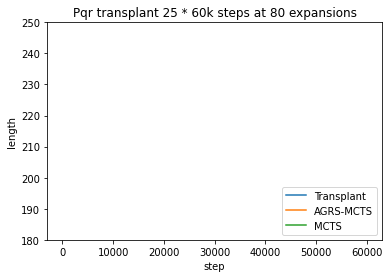

In [27]:
fig, axs = plt.subplots(ncols=1)
plt.title('Pqr transplant 25 * 60k steps at 80 expansions')
sns.lineplot(x="step", y="length", data=df_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_agrs_no,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_no_agrs,ax=axs, ci=99)

axs.set(ylim=(180, 250))
#axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["length"] + df_no_agrs["length_se"], 
                 #y2=df_no_agrs["length"] - df_no_agrs["length_se"], alpha=.5, color='#55a868')
#axs.fill_between(x=df_agrs_no["step"], y1=df_agrs_no["length"] + df_agrs_no["length_se"], 
                 #y2=df_agrs_no["length"] - df_agrs_no["length_se"], alpha=.5, color='#dd8452')

#axs.fill_between(x=df_agrs["step"], y1=df_agrs["length"] + df_agrs["length_se"], 
                 #y2=df_agrs["length"] - df_agrs["length_se"], alpha=.5, color='#4c72b0')
axs.legend(['Transplant','AGRS-MCTS', 'MCTS'], loc=4)